In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import sys
import os
import seaborn
from  matplotlib import pyplot
import scale_setters as scale

In [2]:
def beta_to_temperature(Nt, beta_crit, betas):
    scale_setter = scale.SymanzikScaleSetter()
    a_crit = scale_setter._get_spacing_in_fm(beta_crit)
    a_arr = scale_setter.get_spacing_in_fm(betas)

    return [a_crit / a for a in a_arr]

In [3]:
a = [(1, 2), (3, 4)]
for i in a:
    print(i[0], i[1])

1 2
3 4


In [4]:
def get_closest(betas_arr, value):
    closest_T = 0
    for i in range(len(betas_arr)):
        if abs(betas_arr[i][0] - value) < abs(closest_T - value):
            closest_T = betas_arr[i][0]
            index = i
    return betas_arr[index]

def find_closest_betas(betas_fixed, betas_test):
    betas_result = []
    for beta in betas_fixed:
        betas_result.append(get_closest(betas_test, beta[0]))
    return betas_result

[(0.7019428809672871, 3.88), (0.9439817460156759, 4.04), (1.0836579053625524, 4.12), (1.2369973962720728, 4.2), (1.3615068100588277, 4.26), (1.5882825655926287, 4.36), (2.005654161496961, 4.52), (2.4987751805148486, 4.68), (3.0802157220974715, 4.84), (3.766205290047355, 5.0)]
[(0.7018098698279484, 4.099000000000033), (0.9443472742287518, 4.281000000000094), (1.0837238488789929, 4.371000000000124), (1.2372356696950624, 4.461000000000154), (1.361342541048485, 4.528000000000176), (1.5890878057742406, 4.640000000000214), (2.0045286881625666, 4.8160000000002725), (2.499648429799155, 4.991000000000331), (3.0793280630932105, 5.162000000000388), (3.7656513586930456, 5.3310000000004445)]
          T   beta  Nt
0  0.701943  3.880   4
1  0.943982  4.040   4
2  1.083658  4.120   4
3  1.236997  4.200   4
4  1.361507  4.260   4
5  1.588283  4.360   4
6  2.005654  4.520   4
7  2.498775  4.680   4
8  3.080216  4.840   4
9  3.766205  5.000   4
0  0.701810  4.099   6
1  0.944347  4.281   6
2  1.083724  

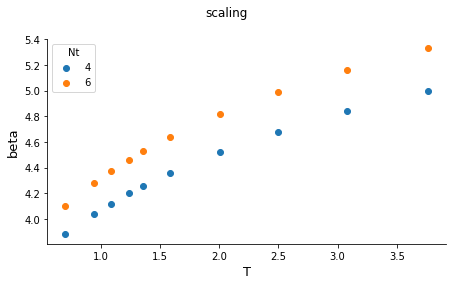

In [5]:
beta_crit = {4: 4.073, 5: 4.202, 6: 4.318}
betas_4 = [3.88, 4.04, 4.12, 4.2, 4.26, 4.36, 4.52, 4.68, 4.84, 5.0]
# betas = [4.0, 4.04, 4.08, 4.12, 4.20, 4.26, 4.36, 4.52, 4.68, 4.84, 5.00]
# 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.4 2.78
# betas = [4.04, 4.16, 4.28, 4.4, 4.5, 4.6, 4.68, 4.76, 4.88, 5.00]
betas_test_5 = np.arange(4, 6, 0.001)
betas_test_6 = np.arange(4, 6, 0.001)
T_4 = beta_to_temperature(4, beta_crit[4], betas_4)
T_test_5 = beta_to_temperature(5, beta_crit[5], betas_test_5)
T_test_6 = beta_to_temperature(6, beta_crit[6], betas_test_6)
# closest_betas_5 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_5, betas_test_5)))
closest_betas_6 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_6, betas_test_6)))

print(list(zip(T_4, betas_4)))
# print(closest_betas_5)
print(closest_betas_6)

# x = [i[0] for i in closest_betas_5]
# y = [i[1] for i in closest_betas_5]
x = [i[0] for i in closest_betas_6]
y = [i[1] for i in closest_betas_6]

df_4 = pd.DataFrame(list(zip(T_4, betas_4)), columns=['T', 'beta'])
df_4['Nt'] = 4
# df_5 = pd.DataFrame(closest_betas_5, columns=['T', 'beta'])
# df_5['Nt'] = 5
# df = pd.concat([df_4, df_5])
df_6 = pd.DataFrame(closest_betas_6, columns=['T', 'beta'])
df_6['Nt'] = 6
df = pd.concat([df_4, df_6])
print(df)

fg = seaborn.FacetGrid(data=df, hue = 'Nt', height=4, aspect=1.6, legend_out=False)
fg.fig.suptitle('scaling')
fontsize = 13
fg.ax.set_xlabel(r'$T/T_{0}$', fontsize=fontsize)
fg.ax.set_ylabel(r'$\beta$', fontsize=fontsize)
fg.map(plt.scatter, 'T', 'beta').add_legend()

[(0.7019428809672871, 3.88), (0.9439817460156759, 4.04), (1.0836579053625524, 4.12), (1.2369973962720728, 4.2), (1.3615068100588277, 4.26), (1.5882825655926287, 4.36), (2.005654161496961, 4.52), (2.4987751805148486, 4.68), (3.0802157220974715, 4.84), (3.766205290047355, 5.0)]
[(0.7082801677504683, 4.0), (0.9444150855816807, 4.167000000000056), (1.0833229946333303, 4.252000000000084), (1.2379006818421867, 4.338000000000113), (1.3606558948531131, 4.401000000000134), (1.5889099962784257, 4.50800000000017), (2.005426128578226, 4.677000000000226), (2.4979380770814528, 4.845000000000282), (3.0800711257293987, 5.012000000000338), (3.764442238535339, 5.177000000000393)]
          T   beta  Nt
0  0.701943  3.880   4
1  0.943982  4.040   4
2  1.083658  4.120   4
3  1.236997  4.200   4
4  1.361507  4.260   4
5  1.588283  4.360   4
6  2.005654  4.520   4
7  2.498775  4.680   4
8  3.080216  4.840   4
9  3.766205  5.000   4
0  0.708280  4.000   5
1  0.944415  4.167   5
2  1.083323  4.252   5
3  1.23

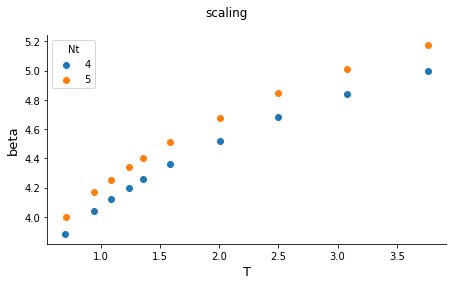

In [7]:
beta_crit = {4: 4.073, 5: 4.202, 6: 4.318}
betas_4 = [3.88, 4.04, 4.12, 4.2, 4.26, 4.36, 4.52, 4.68, 4.84, 5.0]
# betas = [4.0, 4.04, 4.08, 4.12, 4.20, 4.26, 4.36, 4.52, 4.68, 4.84, 5.00]
# 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.4 2.78
# betas = [4.04, 4.16, 4.28, 4.4, 4.5, 4.6, 4.68, 4.76, 4.88, 5.00]
betas_test_5 = np.arange(4, 6, 0.001)
betas_test_6 = np.arange(4, 6, 0.001)
T_4 = beta_to_temperature(4, beta_crit[4], betas_4)
T_test_5 = beta_to_temperature(5, beta_crit[5], betas_test_5)
T_test_6 = beta_to_temperature(6, beta_crit[6], betas_test_6)
closest_betas_5 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_5, betas_test_5)))
closest_betas_6 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_6, betas_test_6)))

print(list(zip(T_4, betas_4)))
print(closest_betas_5)
# print(closest_betas_6)

x = [i[0] for i in closest_betas_5]
y = [i[1] for i in closest_betas_5]
# x = [i[0] for i in closest_betas_6]
# y = [i[1] for i in closest_betas_6]

df_4 = pd.DataFrame(list(zip(T_4, betas_4)), columns=['T', 'beta'])
df_4['Nt'] = 4
df_5 = pd.DataFrame(closest_betas_5, columns=['T', 'beta'])
df_5['Nt'] = 5
df = pd.concat([df_4, df_5])
# df_6 = pd.DataFrame(closest_betas_6, columns=['T', 'beta'])
# df_6['Nt'] = 6
# df = pd.concat([df_4, df_6])
print(df)

fg = seaborn.FacetGrid(data=df, hue = 'Nt', height=4, aspect=1.6, legend_out=False)
fg.fig.suptitle('scaling')
fontsize = 13
fg.ax.set_xlabel(r'$T/T_{0}$', fontsize=fontsize)
fg.ax.set_ylabel(r'$\beta$', fontsize=fontsize)
fg.map(plt.scatter, 'T', 'beta').add_legend()

[(0.7001333930400707, 3.88), (0.9422977863699302, 4.04), (1.0862739733760185, 4.12), (1.2435781900630793, 4.2), (1.3698213256177822, 4.26), (1.5957140755404429, 4.36), (1.999566677958668, 4.52), (2.4639184571560095, 4.68), (3.0030925821277275, 4.84), (3.635311674327241, 5.0)]
[(0.7000410904049937, 4.100000000000033), (0.9417948766839797, 4.279000000000093), (1.087049952157927, 4.374000000000125), (1.2427630484580536, 4.468000000000156), (1.368936993554376, 4.53900000000018), (1.5948943315102013, 4.656000000000219), (1.9992579599624793, 4.83800000000028), (2.423163730322137, 4.999000000000334), (2.423163730322137, 4.999000000000334), (2.423163730322137, 4.999000000000334)]
          T   beta  Nt
0  0.700133  3.880   4
1  0.942298  4.040   4
2  1.086274  4.120   4
3  1.243578  4.200   4
4  1.369821  4.260   4
5  1.595714  4.360   4
6  1.999567  4.520   4
7  2.463918  4.680   4
8  3.003093  4.840   4
9  3.635312  5.000   4
0  0.700041  4.100   6
1  0.941795  4.279   6
2  1.087050  4.374  

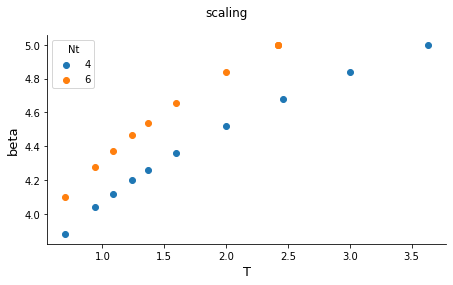

In [5]:
beta_crit = {4: 4.073, 5: 4.202, 6: 4.318}
betas_4 = [3.88, 4.04, 4.12, 4.2, 4.26, 4.36, 4.52, 4.68, 4.84, 5.0]
# betas = [4.0, 4.04, 4.08, 4.12, 4.20, 4.26, 4.36, 4.52, 4.68, 4.84, 5.00]
# 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.4 2.78
# betas = [4.04, 4.16, 4.28, 4.4, 4.5, 4.6, 4.68, 4.76, 4.88, 5.00]
betas_test_5 = np.arange(4, 5, 0.001)
betas_test_6 = np.arange(4, 5, 0.001)
T_4 = beta_to_temperature(4, beta_crit[4], betas_4)
T_test_5 = beta_to_temperature(5, beta_crit[5], betas_test_5)
T_test_6 = beta_to_temperature(6, beta_crit[6], betas_test_6)
# closest_betas_5 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_5, betas_test_5)))
closest_betas_6 = find_closest_betas(list(zip(T_4, betas_4)), list(zip(T_test_6, betas_test_6)))

print(list(zip(T_4, betas_4)))
# print(closest_betas_5)
print(closest_betas_6)

# x = [i[0] for i in closest_betas_5]
# y = [i[1] for i in closest_betas_5]
x = [i[0] for i in closest_betas_6]
y = [i[1] for i in closest_betas_6]

df_4 = pd.DataFrame(list(zip(T_4, betas_4)), columns=['T', 'beta'])
df_4['Nt'] = 4
# df_5 = pd.DataFrame(closest_betas_5, columns=['T', 'beta'])
# df_5['Nt'] = 5
# df = pd.concat([df_4, df_5])
df_6 = pd.DataFrame(closest_betas_6, columns=['T', 'beta'])
df_6['Nt'] = 6
df = pd.concat([df_4, df_6])
print(df)

fg = seaborn.FacetGrid(data=df, hue = 'Nt', height=4, aspect=1.6, legend_out=False)
fg.fig.suptitle('scaling')
fontsize = 13
fg.ax.set_xlabel(r'$T/T_{0}$', fontsize=fontsize)
fg.ax.set_ylabel(r'$\beta$', fontsize=fontsize)
fg.map(plt.scatter, 'T', 'beta').add_legend()


In [6]:
def closest_a(a, betas_test, scale_setter):
    a_test = scale_setter.get_spacing_in_fm(betas_test)
    closest_a = 0
    for i in range(len(a_test)):
        if abs(a_test[i] - a) < abs(closest_a - a):
             closest_a = a_test[i]
             index = i

    return betas_test[index]

def find_beta(beta1, Nt1, Nt2):
    scale_setter = scale.SymanzikScaleSetter()
    a1 = scale_setter._get_spacing_in_fm(beta1)
    a2 = a1 / Nt2 * Nt1
    betas_test = np.arange(3.85, 5, 0.001)
    return closest_a(a2, betas_test, scale_setter)

In [7]:
beta_crit = {4: 4.12, 5: 4.253, 6: 4.374}
for Nt, beta in beta_crit.items():
    print(find_beta(beta, Nt, 3))

3.960999999999988
3.959999999999988
3.960999999999988
